In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [115]:
df=pd.read_csv("https://raw.githubusercontent.com/611noorsaeed/Resume-Screening-App/main/UpdatedResumeDataSet.csv")
df.head(2)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...


In [116]:
df.shape

(962, 2)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [118]:
df.isna().sum()

Category    0
Resume      0
dtype: int64

In [119]:
df.duplicated().sum()

796

In [120]:
df["Category"].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

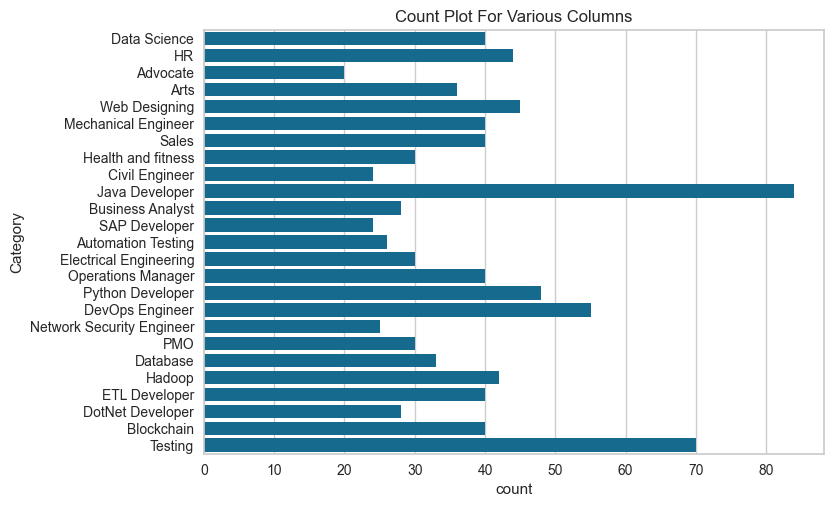

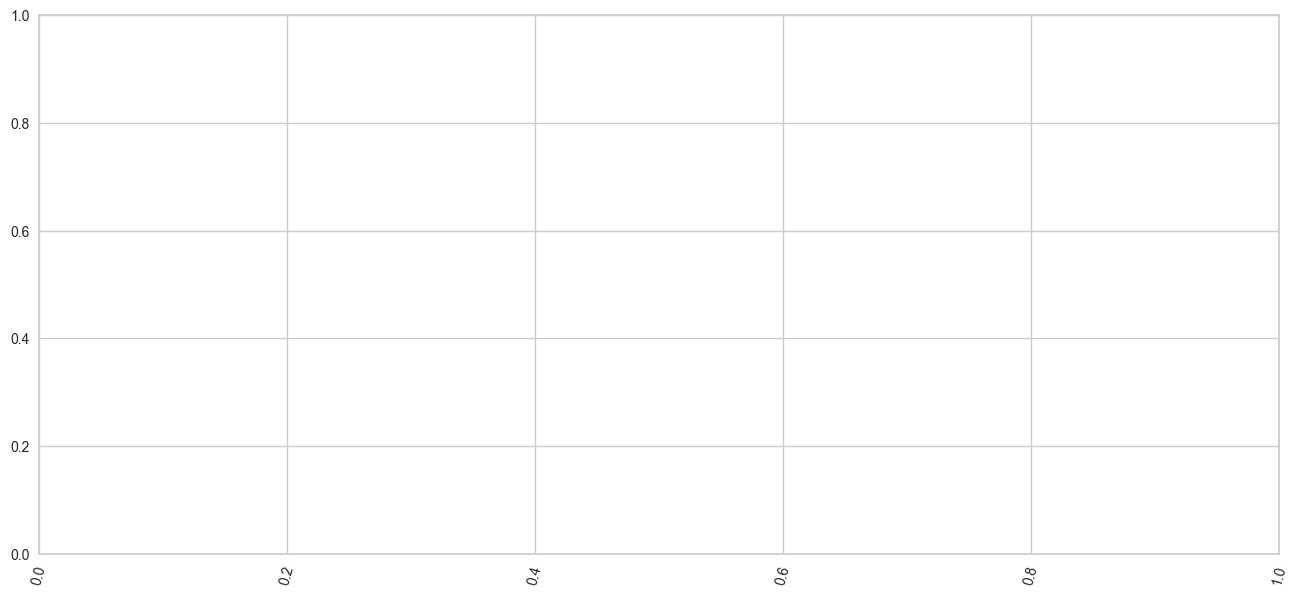

In [121]:
sns.countplot(df["Category"])
plt.title("Count Plot For Various Columns")
plt.figure(figsize=(16,7))
plt.xticks(rotation=75)
plt.show()

In [122]:
df["Category"].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

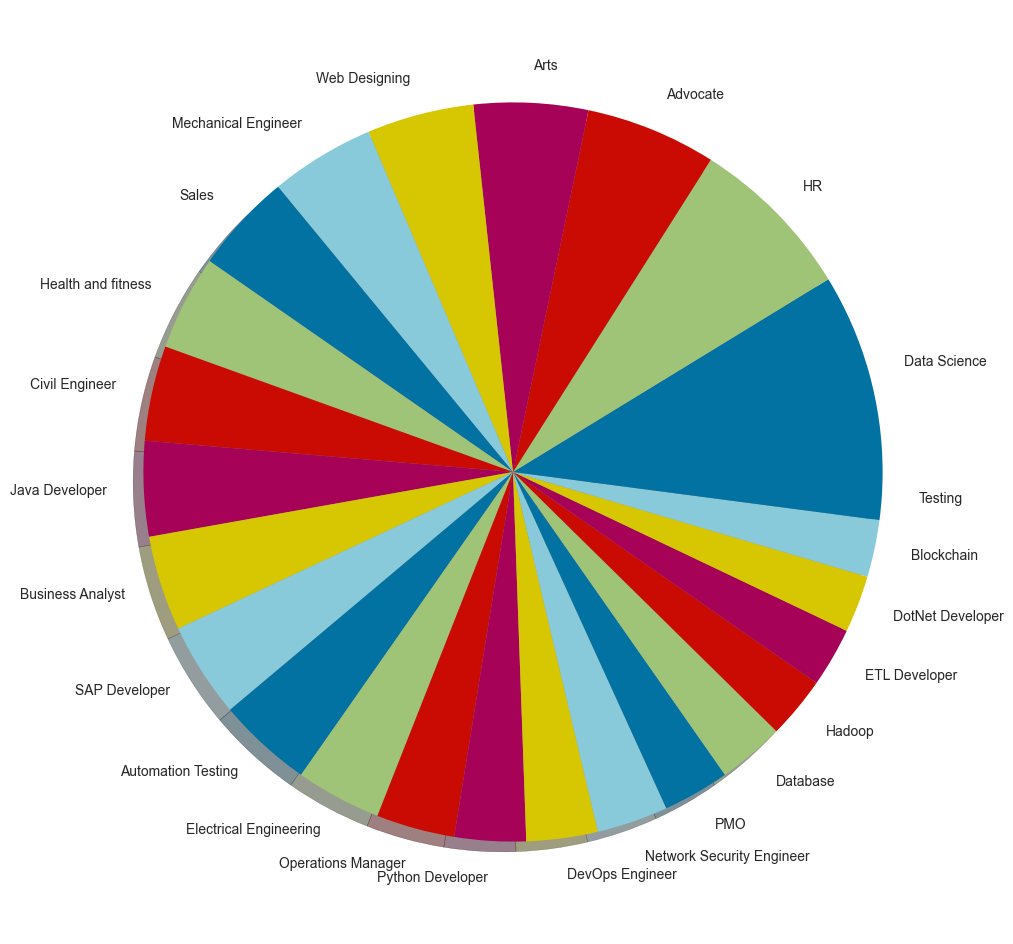

In [123]:
counts=df["Category"].value_counts()
labels=df["Category"].unique()
plt.figure(figsize=(20,12))
plt.pie(counts,labels=labels,shadow=True,)
plt.show()



In [124]:
import re

In [125]:
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [126]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))


In [127]:
print(df["Resume"][0])

Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the r

In [128]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [129]:
le.fit(df['Category'])
df['Category_Encoding'] = le.transform(df['Category'])

In [73]:
df["Category"].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [131]:
category_mapping = dict(zip(df['Category'], df['Category_Encoding']))
category_mapping

{'Data Science': 6,
 'HR': 12,
 'Advocate': 0,
 'Arts': 1,
 'Web Designing': 24,
 'Mechanical Engineer': 16,
 'Sales': 22,
 'Health and fitness': 14,
 'Civil Engineer': 5,
 'Java Developer': 15,
 'Business Analyst': 4,
 'SAP Developer': 21,
 'Automation Testing': 2,
 'Electrical Engineering': 11,
 'Operations Manager': 18,
 'Python Developer': 20,
 'DevOps Engineer': 8,
 'Network Security Engineer': 17,
 'PMO': 19,
 'Database': 7,
 'Hadoop': 13,
 'ETL Developer': 10,
 'DotNet Developer': 9,
 'Blockchain': 3,
 'Testing': 23}

In [133]:
df=df.drop(columns=["Category"])

In [135]:
X=df["Resume"]
y=df["Category_Encoding"]

In [136]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.23,random_state=32,shuffle=True)


In [137]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((740,), (740,), (222,), (222,))

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorize=TfidfVectorizer(stop_words="english")

In [139]:
X_train_vectorize=tfidf_vectorize.fit_transform(X_train)

In [140]:
X_train_vectorize

<740x7221 sparse matrix of type '<class 'numpy.float64'>'
	with 122715 stored elements in Compressed Sparse Row format>

In [141]:
X_test_vectorize=tfidf_vectorize.transform(X_test)

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [143]:
clf=KNeighborsClassifier()
clf.fit(X_train_vectorize,y_train,)

KNeighborsClassifier()

In [144]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,roc_curve,auc

def evaluate_model(model, name):
 
    model.fit(X_train_vectorize.toarray(), y_train)

    y_pred = model.predict(X_test_vectorize.toarray())

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

    results = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "name": name
    }

    return results

In [145]:
all_models=[]

In [146]:
models=[
    ("knc",KNeighborsClassifier()),
    ("bnb",BernoulliNB()),
    ("gnb",GaussianNB()),
    ("mnb",MultinomialNB()),
    ("rfc",RandomForestClassifier()),
    ("dtf",DecisionTreeClassifier())
]
for name,model in models:
    model_dict=evaluate_model(model,name)
    all_models.append(model_dict)
    


In [147]:
all_model_df=pd.DataFrame(all_models).sort_values(by=["precision","accuracy"],ignore_index=True,ascending=False)

In [148]:
all_model_df

,accuracy,precision,recall,f1_score,name
0,0.986486,0.989407,0.986486,0.986749,dtf
1,0.981982,0.985870,0.981982,0.982265,gnb
2,0.981982,0.984921,0.981982,0.981961,rfc
3,0.968468,0.971970,0.968468,0.967906,knc
4,0.909910,0.947587,0.909910,0.895147,mnb
5,0.716216,0.931451,0.716216,0.743260,bnb


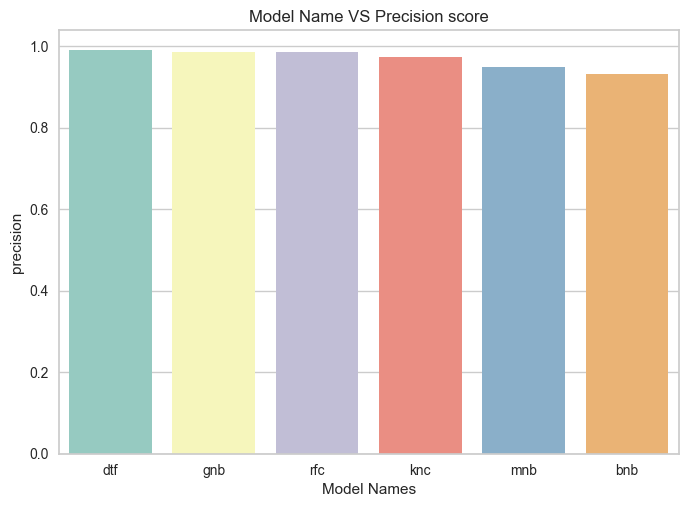

<Figure size 1200x800 with 0 Axes>

In [149]:
sns.barplot(y=all_model_df["precision"],x=all_model_df["name"],palette="Set3")
plt.title("Model Name VS Precision score")
plt.xlabel("Model Names")
plt.figure(figsize=(12,8))
plt.show()

In [150]:
from sklearn.multiclass import OneVsOneClassifier


In [151]:
classifier = OneVsOneClassifier(DecisionTreeClassifier())
classifier.fit(X_train_vectorize, y_train)

OneVsOneClassifier(estimator=DecisionTreeClassifier())

In [152]:
y_scores = classifier.decision_function(X_test_vectorize)
y_scores

array([[14.7       , 11.69444444, 12.7       , ..., 24.31884058,
        20.31666667, 15.3125    ],
       [15.7037037 , 11.69444444, 13.7037037 , ..., 14.30769231,
        19.31578947, 16.31372549],
       [10.69047619, 13.7       , 11.6969697 , ..., 13.30555556,
        21.31746032, 17.31481481],
       ...,
       [12.69444444, 14.7037037 , 11.6969697 , ..., 17.3125    ,
        18.31481481, 18.31578947],
       [ 8.6875    , 13.7       , 23.16666667, ..., 15.30952381,
        18.31481481, 15.3125    ],
       [12.69444444, 13.7       , 11.6969697 , ..., 19.31481481,
        18.31481481, 16.31372549]])

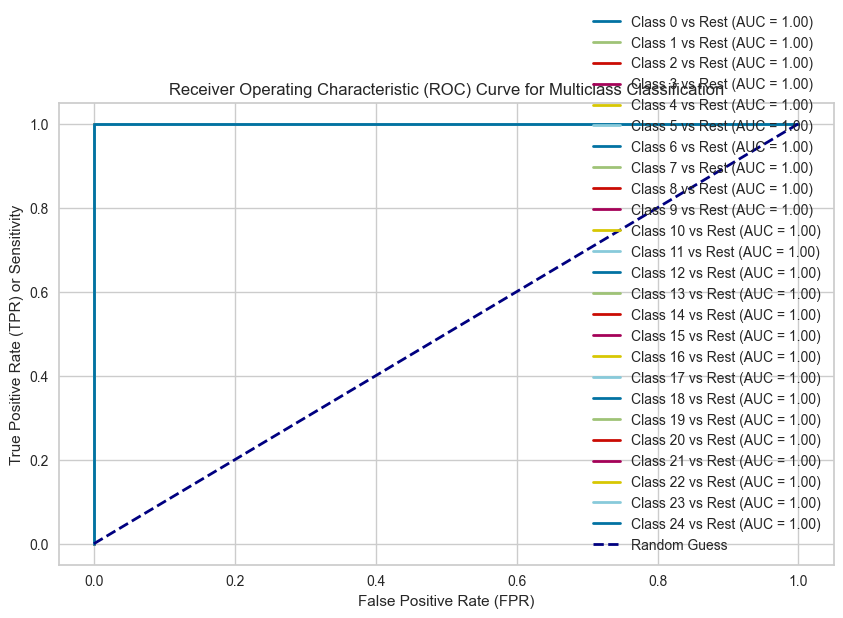

<Figure size 3200x800 with 0 Axes>

In [153]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(classifier.classes_.shape[0]):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
for i in range(classifier.classes_.shape[0]):
    plt.plot(fpr[i], tpr[i], lw=2, label='Class {} vs Rest (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.figure(figsize=(32,8))
plt.show()


In [154]:
print(f"The Precision Score is: {precision_score(classifier.predict(X_test_vectorize),y_test,average='weighted')}")
print(f"The Accuracy Score is: {accuracy_score(classifier.predict(X_test_vectorize),y_test)}")
print(f"The Recall Score is: {recall_score(classifier.predict(X_test_vectorize),y_test,average='weighted')}")
print(f"The F1 Score is: {f1_score(classifier.predict(X_test_vectorize),y_test,average='weighted')}")

The Precision Score is: 1.0
The Accuracy Score is: 1.0
The Recall Score is: 1.0
The F1 Score is: 1.0


In [155]:
import pickle
with open('./pklFiles/model.pkl', 'wb') as file:
    pickle.dump(classifier, file)


In [156]:
with open('./pklFiles/tfidf.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorize, file)

In [157]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [158]:
cleaned_resume = cleanResume(myresume)

In [159]:
cleaned_resume

'I am a data scientist specializing in machine learning deep learning and computer vision With a strong background in mathematics statistics and programming I am passionate about uncovering hidden patterns and insights in data I have extensive experience in developing predictive models implementing deep learning algorithms and designing computer vision systems My technical skills include proficiency in Python Sklearn TensorFlow and PyTorch What sets me apart is my ability to effectively communicate complex concepts to diverse audiences I excel in translating technical insights into actionable recommendations that drive informed decision making If you re looking for a dedicated and versatile data scientist to collaborate on impactful projects I am eager to contribute my expertise Let s harness the power of data together to unlock new possibilities and shape a better future Contact Sources Email 611noorsaeed Phone 03442826192 Github Linkdin Blogs Youtube Artificial Intelligence ABOUT ME 

In [160]:
input_features = tfidf_vectorize.transform([cleaned_resume])

In [161]:
input_features

<1x7221 sparse matrix of type '<class 'numpy.float64'>'
	with 94 stored elements in Compressed Sparse Row format>

In [162]:
prediction_id = clf.predict(input_features)[0]


In [163]:
prediction_id

6

In [177]:
for i,val in category_mapping.items():
    if val==prediction_id:
        print("Predicted Category:", i)


Predicted Category: Data Science
